#### This notebook does the basic NLP analysis by counting the tokens/words appear frequency in the book.

# highlights & why I like this book?
1. Total 444 questions which provides enless topics that help kids learn how to express themselves. They can always skip to the next question if some topics cannot raise their interest. 
2. "school" appears 115 times as the highest "meaningful" word, which gives you 100+ different varieties of asking "How is the school?".
3. Long tail distribution of verb, noun and adjective(having many low frequency tokens) suggests that this book covers a wide range of topics and have serious questions .

Total questions: 444<br>
Total question mark "?": 477<br>
Total token: 5556<br>
Total unique token: 755<br>
Total unique nouns: 338<br>
Total unique verb: 255<br>
Total unique adjective: 145<br>
Noun that occur only once: 226<br>
Verb that occur only once: 137<br>
Adjective that occur only once: 94<br>

In [1]:
import csv
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df_questions = pd.read_csv('data_how_was_your_day.csv', encoding='cp1252')
POS_Tag_Dict = pd.read_csv('POS_tag_dictionary.csv', encoding='cp1252')
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [3]:
#tokenize
#lower case
df_questions['token']=df_questions['Questions'].str.lower().apply(lambda x: nltk.word_tokenize(x))
df_questions['tagger']=df_questions['token'].apply(lambda x: nltk.pos_tag(x))

lemmatization is the process to reduce the word to its root form.<br>
POS tagging(Part-of-speech tagging): https://en.wikipedia.org/wiki/Part-of-speech_tagging<br>
POS tagging reference: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


In [4]:
# lemmatization preparation
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# define lemmatization function using POS_tag    
def lemmatize_with_pos(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    lemmatized_sentence = []
    for word, tag in tagged:
        wordnet_tag = get_wordnet_pos(tag)
        if wordnet_tag is None:
            # If there is no available WordNet POS tag, lemmatize the word without a POS tag
            lemmatized_word = lemmatizer.lemmatize(word)
        else:
            lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_tag)
#         lemmatized_sentence.append((lemmatized_word,tag))
        lemmatized_sentence.append(lemmatized_word)
    return lemmatized_sentence

In [5]:
# lemmatization
df_questions['token_lemmatized'] = df_questions['Questions'].str.lower().apply(lemmatize_with_pos)
df_questions['tag_lemmatized'] = df_questions['token_lemmatized'].apply(lambda x: nltk.pos_tag(x))

In [6]:
#POS tag counts
#get all POS tags
all_POS_tags = [token[1] for sublist in df_questions['tag_lemmatized'] for token in sublist]
# join the POS tag dictionary
tag_counts = pd.DataFrame.from_dict(Counter(all_POS_tags), orient='index').reset_index().set_axis(['POS_tag','counts'], axis=1)\
.sort_values(by=['counts'], ascending=False).set_index('POS_tag').join(POS_Tag_Dict.set_index('POS_Tag'))
tag_counts

,counts,POS_Tag_Description
POS_tag,,
NN,954,"Noun, singular or mass"
VB,740,"Verb, base form"
PRP,497,Personal pronoun
IN,478,Preposition or subordinating conjunction
.,477,NaN
VBP,347,"Verb, non-3rd person singular present"
DT,314,Determiner
JJ,259,Adjective
WP,250,Wh-pronoun


In [7]:
#token frequency counts
all_token_tag_pair = pd.DataFrame([token for sublist in df_questions['tag_lemmatized'] for token in sublist],columns=['token','POS_tag'])
all_token_tag_pair_counts=all_token_tag_pair.groupby(['token','POS_tag']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)\
.set_index('POS_tag').join(POS_Tag_Dict.set_index('POS_Tag'))
all_token_tag_pair_counts.head(10).reset_index()

,POS_tag,token,counts,POS_Tag_Description
0,.,?,477,NaN
1,PRP,you,410,Personal pronoun
2,VB,be,229,"Verb, base form"
3,WP,what,195,Wh-pronoun
4,TO,to,147,to
5,DT,the,134,Determiner
6,PRP$,your,122,Possessive pronoun
7,NN,school,115,"Noun, singular or mass"
8,DT,a,113,Determiner
9,MD,would,104,Modal


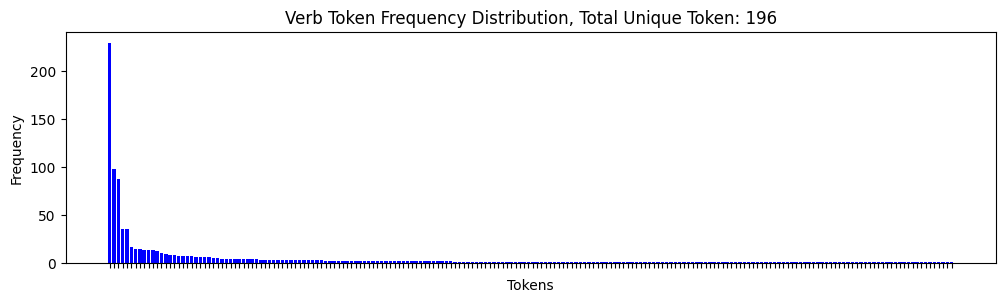

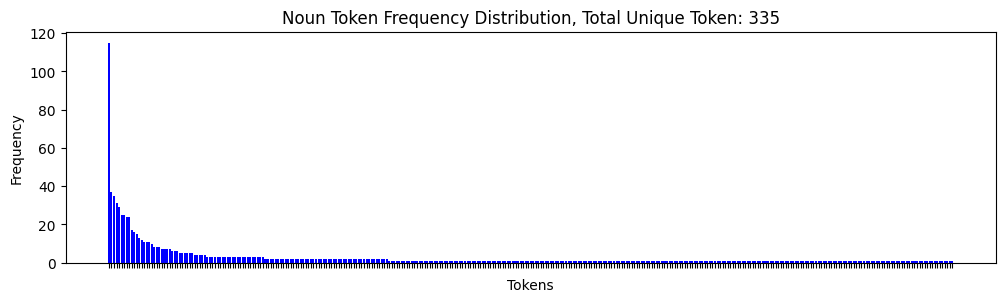

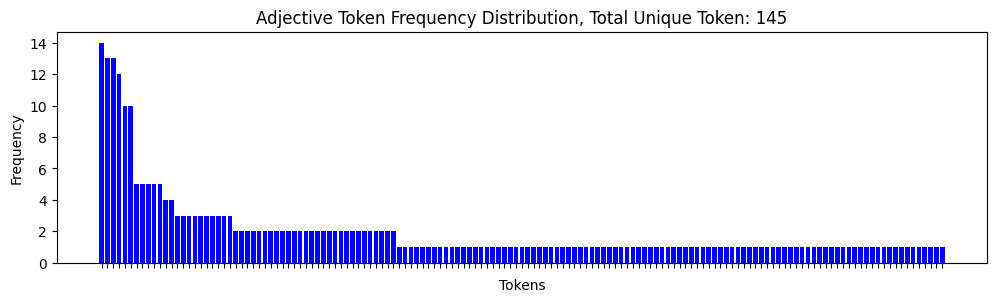

In [8]:
# bar chart of verb, noun and adjective
token_VB_counts=all_token_tag_pair_counts[all_token_tag_pair_counts.index.astype(str).str[0:2]=='VB']
token_NN_counts=all_token_tag_pair_counts[all_token_tag_pair_counts.index.astype(str).str[0:2]=='NN']
token_JJ_counts=all_token_tag_pair_counts[all_token_tag_pair_counts.index.astype(str).str[0:2]=='JJ']
## Plot verb frequency
plt.figure(figsize=(12, 3))
plt.bar(token_VB_counts['token'], token_VB_counts['counts'], color='blue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Verb Token Frequency Distribution, Total Unique Token: {}'.format(len(np.unique(token_VB_counts['token']))))
plt.gca().set_xticklabels([])
plt.show()
## Plot noun frequency
plt.figure(figsize=(12, 3))
plt.bar(token_NN_counts['token'], token_NN_counts['counts'], color='blue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Noun Token Frequency Distribution, Total Unique Token: {}'.format(len(np.unique(token_NN_counts['token']))))
plt.gca().set_xticklabels([])
plt.show()
# plot adjective frequency
plt.figure(figsize=(12, 3))
plt.bar(token_JJ_counts['token'], token_JJ_counts['counts'], color='blue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Adjective Token Frequency Distribution, Total Unique Token: {}'.format(len(np.unique(token_JJ_counts['token']))))
plt.gca().set_xticklabels([])
plt.show()

In [9]:
print('Total questions:',len(df_questions))
print('Total question mark:',len(all_token_tag_pair[all_token_tag_pair['token']=='?']))
print('Total token:',len(all_token_tag_pair))
print('Total unique token:',len(np.unique(all_token_tag_pair['token'])))
print('Total unique nouns:',len(token_NN_counts))
print('Total unique verb:',len(token_VB_counts))
print('Total unique adjective:',len(token_JJ_counts))
print('Noun that occur only once:',len(np.unique(token_NN_counts[token_NN_counts['counts']==1]['token'])))
print('Verb that occur only once:',len(np.unique(token_VB_counts[token_VB_counts['counts']==1]['token'])))
print('Adjective that occur only once:',len(np.unique(token_JJ_counts[token_JJ_counts['counts']==1]['token'])))

Total questions: 444
Total question mark: 477
Total token: 5556
Total unique token: 755
Total unique nouns: 338
Total unique verb: 255
Total unique adjective: 145
Noun that occur only once: 226
Verb that occur only once: 137
Adjective that occur only once: 94
